# Assignment- Advanced Regression

#### Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual value and flip them at a higher price. For the same purpose, the company has collected a data set from house sales in Australia. The data is provided in the csv file below.

 

The company is looking at prospective properties to buy to enter the market.

You are required to build a regression model using regularization, so as to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house

How well those variables describe the price of a house

 

Also, determine the optimal value of lambda for ridge and lasso regression. 

#### Business Goal

You are required to model the price of houses with the available independent variables. It will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high rewards. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1306]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

## Import and inspect data frame

In [1307]:
# reading the dataset from .csv file
housing_df = pd.read_csv("train.csv")

In [1308]:
# summary of the dataset
print(housing_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [1309]:
# head of data set
housing_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [1310]:
# check distribution of data 
housing_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

## Data preparation and EDA

#### Check na values

In [1311]:
# let's check number of na values in column which has na values
# As we don't want to do anything on columns having 0 na values 
housing_df.loc[:, housing_df.isnull().any()].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [1312]:
## evaluating the percenatage of na values in columns having na values
print(round(100*(housing_df.loc[:, housing_df.isnull().any()].isnull().sum())/len(housing_df.index), 2))

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64


#### Understanding the Data Dictionary

Let's check values in each column before imputing data in place of na values

In [1313]:
# data distribution in MSZoning column
housing_df['MSZoning'].astype('category').value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [1314]:
# data distribution in Street column
housing_df['Street'].astype('category').value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [1315]:
# data distribution in Alley column
housing_df['Alley'].astype('category').value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [1316]:
# data distribution in LotShape column
housing_df['LotShape'].astype('category').value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [1317]:
# data distribution in LandContour column
housing_df['LandContour'].astype('category').value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [1318]:
# data distribution in Utilities column
housing_df['Utilities'].astype('category').value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [1319]:
# data distribution in LotConfig column
housing_df['LotConfig'].astype('category').value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [1320]:
# data distribution in LandSlope column
housing_df['LandSlope'].astype('category').value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [1321]:
# data distribution in Neighborhood column
housing_df['Neighborhood'].astype('category').value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [1322]:
# data distribution in Condition1 column
housing_df['Condition1'].astype('category').value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [1323]:
# data distribution in Condition2 column
housing_df['Condition2'].astype('category').value_counts()

Norm      1445
Feedr        6
RRNn         2
PosN         2
Artery       2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64

In [1324]:
# data distribution in BldgType column
housing_df['BldgType'].astype('category').value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [1325]:
# data distribution in HouseStyle column
housing_df['HouseStyle'].astype('category').value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [1326]:
# data distribution in RoofStyle column
housing_df['RoofStyle'].astype('category').value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [1327]:
# data distribution in RoofMatl column
housing_df['RoofMatl'].astype('category').value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Roll          1
Metal         1
Membran       1
ClyTile       1
Name: RoofMatl, dtype: int64

In [1328]:
# data distribution in Exterior1st column
housing_df['Exterior1st'].astype('category').value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
ImStucc      1
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64

In [1329]:
# data distribution in Exterior2nd column
housing_df['Exterior2nd'].astype('category').value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [1330]:
# data distribution in MasVnrType column
housing_df['MasVnrType'].astype('category').value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [1331]:
# data distribution in ExterQual column
housing_df['ExterQual'].astype('category').value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [1332]:
# data distribution in ExterCond column
housing_df['ExterCond'].astype('category').value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [1333]:
# data distribution in Foundation column
housing_df['Foundation'].astype('category').value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [1334]:
# data distribution in BsmtQual column
housing_df['BsmtQual'].astype('category').value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [1335]:
# data distribution in BsmtCond column
housing_df['BsmtCond'].astype('category').value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [1336]:
# data distribution in BsmtExposure column
housing_df['BsmtExposure'].astype('category').value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [1337]:
# data distribution in BsmtFinType1 column
housing_df['BsmtFinType1'].astype('category').value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [1338]:
# data distribution in BsmtFinType2 column
housing_df['BsmtFinType2'].astype('category').value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [1339]:
# data distribution in Heating column
housing_df['Heating'].astype('category').value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [1340]:
# data distribution in HeatingQC column
housing_df['HeatingQC'].astype('category').value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [1341]:
# data distribution in CentralAir column
housing_df['CentralAir'].astype('category').value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [1342]:
# data distribution in Electrical column
housing_df['Electrical'].astype('category').value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [1343]:
# data distribution in KitchenQual column
housing_df['KitchenQual'].astype('category').value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [1344]:
# data distribution in Functional column
housing_df['Functional'].astype('category').value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [1345]:
# data distribution in FireplaceQu column
housing_df['FireplaceQu'].astype('category').value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [1346]:
# data distribution in GarageType column
housing_df['GarageType'].astype('category').value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [1347]:
# data distribution in GarageFinish column
housing_df['GarageFinish'].astype('category').value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [1348]:
# data distribution in GarageQual column
housing_df['GarageQual'].astype('category').value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [1349]:
## data distribution in GarageCond column
housing_df['GarageCond'].astype('category').value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [1350]:
# data distribution in PoolQC column
housing_df['PoolQC'].astype('category').value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [1351]:
# data distribution in Fence column
housing_df['Fence'].astype('category').value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [1352]:
# data distribution in MiscFeature column
housing_df['MiscFeature'].astype('category').value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [1353]:
# data distribution in SaleType column
housing_df['SaleType'].astype('category').value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [1354]:
# data distribution in SaleCondition column
housing_df['SaleCondition'].astype('category').value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

#### imputing values in place of na 

In [1355]:
## now let's look at the percenatage of null data across columns again before imputing them
print(round(100*(housing_df.loc[:, housing_df.isnull().any()].isnull().sum())/len(housing_df.index), 2))

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64


In [1356]:
#Imputing values by looking at the data dictionary provided to us 
#and data distribution across different columns

# based on data dictionary na in Alley means 'No alley access'
housing_df.loc[housing_df['Alley'].isnull(),['Alley']] = 'No alley access'
# LotFrontage can never be 0. So imputing it with mean value
housing_df.loc[housing_df['LotFrontage'].isnull(),['LotFrontage']] = housing_df['LotFrontage'].mean()
# based on data dictionary na in MasVnrType means 'none'
housing_df.loc[housing_df['MasVnrType'].isnull(),['MasVnrType']] = 'none'
# based on data dictionary where MasVnrType type is 'none' area will 0
housing_df.loc[housing_df['MasVnrArea'].isnull(),['MasVnrArea']] = 0
# based on data dictionary na in BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 means ''No Basement'
housing_df.loc[housing_df['BsmtQual'].isnull(),['BsmtQual']] = 'No Basement'
housing_df.loc[housing_df['BsmtCond'].isnull(),['BsmtCond']] = 'No Basement'
housing_df.loc[housing_df['BsmtExposure'].isnull(),['BsmtExposure']] = "No Basement"
housing_df.loc[housing_df['BsmtFinType1'].isnull(),['BsmtFinType1']] = 'No Basement'
housing_df.loc[housing_df['BsmtFinType2'].isnull(),['BsmtFinType2']] = 'No Basement'
# based on data dictionary na in FireplaceQu means 'No Fireplace'
housing_df.loc[housing_df['FireplaceQu'].isnull(),['FireplaceQu']] = 'No Fireplace'
# based on data dictionary na in GarageType,GarageFinish,GarageQual,GarageCond means 'No Garage'
housing_df.loc[housing_df['GarageType'].isnull(),['GarageType']] = 'No Garage'
housing_df.loc[housing_df['GarageFinish'].isnull(),['GarageFinish']] = 'No Garage'
housing_df.loc[housing_df['GarageQual'].isnull(),['GarageQual']] = 'No Garage'
housing_df.loc[housing_df['GarageCond'].isnull(),['GarageCond']] = 'No Garage'
# based on data dictionary na in PoolQC means 'No Pool'
housing_df.loc[housing_df['PoolQC'].isnull(),['PoolQC']] = 'No Pool'
# based on data dictionary na in Fence means 'No Fence'
housing_df.loc[housing_df['Fence'].isnull(),['Fence']] = 'No Fence'
# based on data dictionary na in MiscFeature means 'none'
housing_df.loc[housing_df['MiscFeature'].isnull(),['MiscFeature']] = 'none'
# impute GarageYrBlt with 2019 so that while calculating age it will it will turn to 0
# age = 2019-2019 = 0
housing_df.loc[housing_df['GarageYrBlt'].isnull(),['GarageYrBlt']] = 2019
# impute electrical column with SBrkr as it is the most occuring value
housing_df.loc[housing_df['Electrical'].isnull(),['Electrical']] = "SBrkr"

In [1357]:
## Let's check percentage of null values again after imputation
# You won't see any data now as all the columns are imputed and 
# there is no column with null values
print(round(100*(housing_df.loc[:, housing_df.isnull().any()].isnull().sum())/len(housing_df.index), 2))

Series([], dtype: float64)


#### drop duplicates

In [1358]:
# Let's drop duplicate columns if any present in data set 
housing_df = housing_df.drop_duplicates()
housing_df.shape

(1460, 81)

#### Drop less relevant columns

In [1359]:
# Let's check number of unique entries in each column
housing_df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       111
LotArea          1073
Street              2
Alley               3
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          5
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
                 ... 
BedroomAbvGr        8
KitchenAbvGr        4
KitchenQual         4
TotRmsAbvGrd       12
Functional          7
Fireplaces          4
FireplaceQu         6
GarageType          7
GarageYrBlt        98
GarageFinish        4
GarageCars          5
GarageArea        441
GarageQual          6
GarageCond          6
PavedDrive

In [1360]:
# based on data distribution in each column seen earlier 
# We have found out that 'Street','Utilities','PoolQC' have very low variance 
# And Id column has all unique values
# So let's drop these columns as they won't be that usefull for analysis
housing_df = housing_df.drop(['Street','Utilities','PoolQC','Id'], axis=1)

#### Change data type

In [1361]:
# change data type for MSSubClass to object as it is categorical variable
housing_df[['MSSubClass']] = housing_df[['MSSubClass']].astype('object')

In [1362]:
# cross check if data type for MSSubClass has been changed
print(housing_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 77 columns):
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
MasVnrArea       1460 n

### Check pairplot and heatmap

In [1363]:
# let's take all numeric (float and int) variables in the dataset
# to check pairplot and heatmap
housing_df_numeric = housing_df.select_dtypes(include=['float64', 'int64'])
housing_df_numeric.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF    ...      WoodDeckSF  \
0       196.0         706           0        150    ...               0   
1         0.0         978           0        284    ...             298   
2       162.0         486           0        434    ...               0   
3         0.0         216           0        540    ...               0   
4       350.0         655           0        490    ...             192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 36 columns]

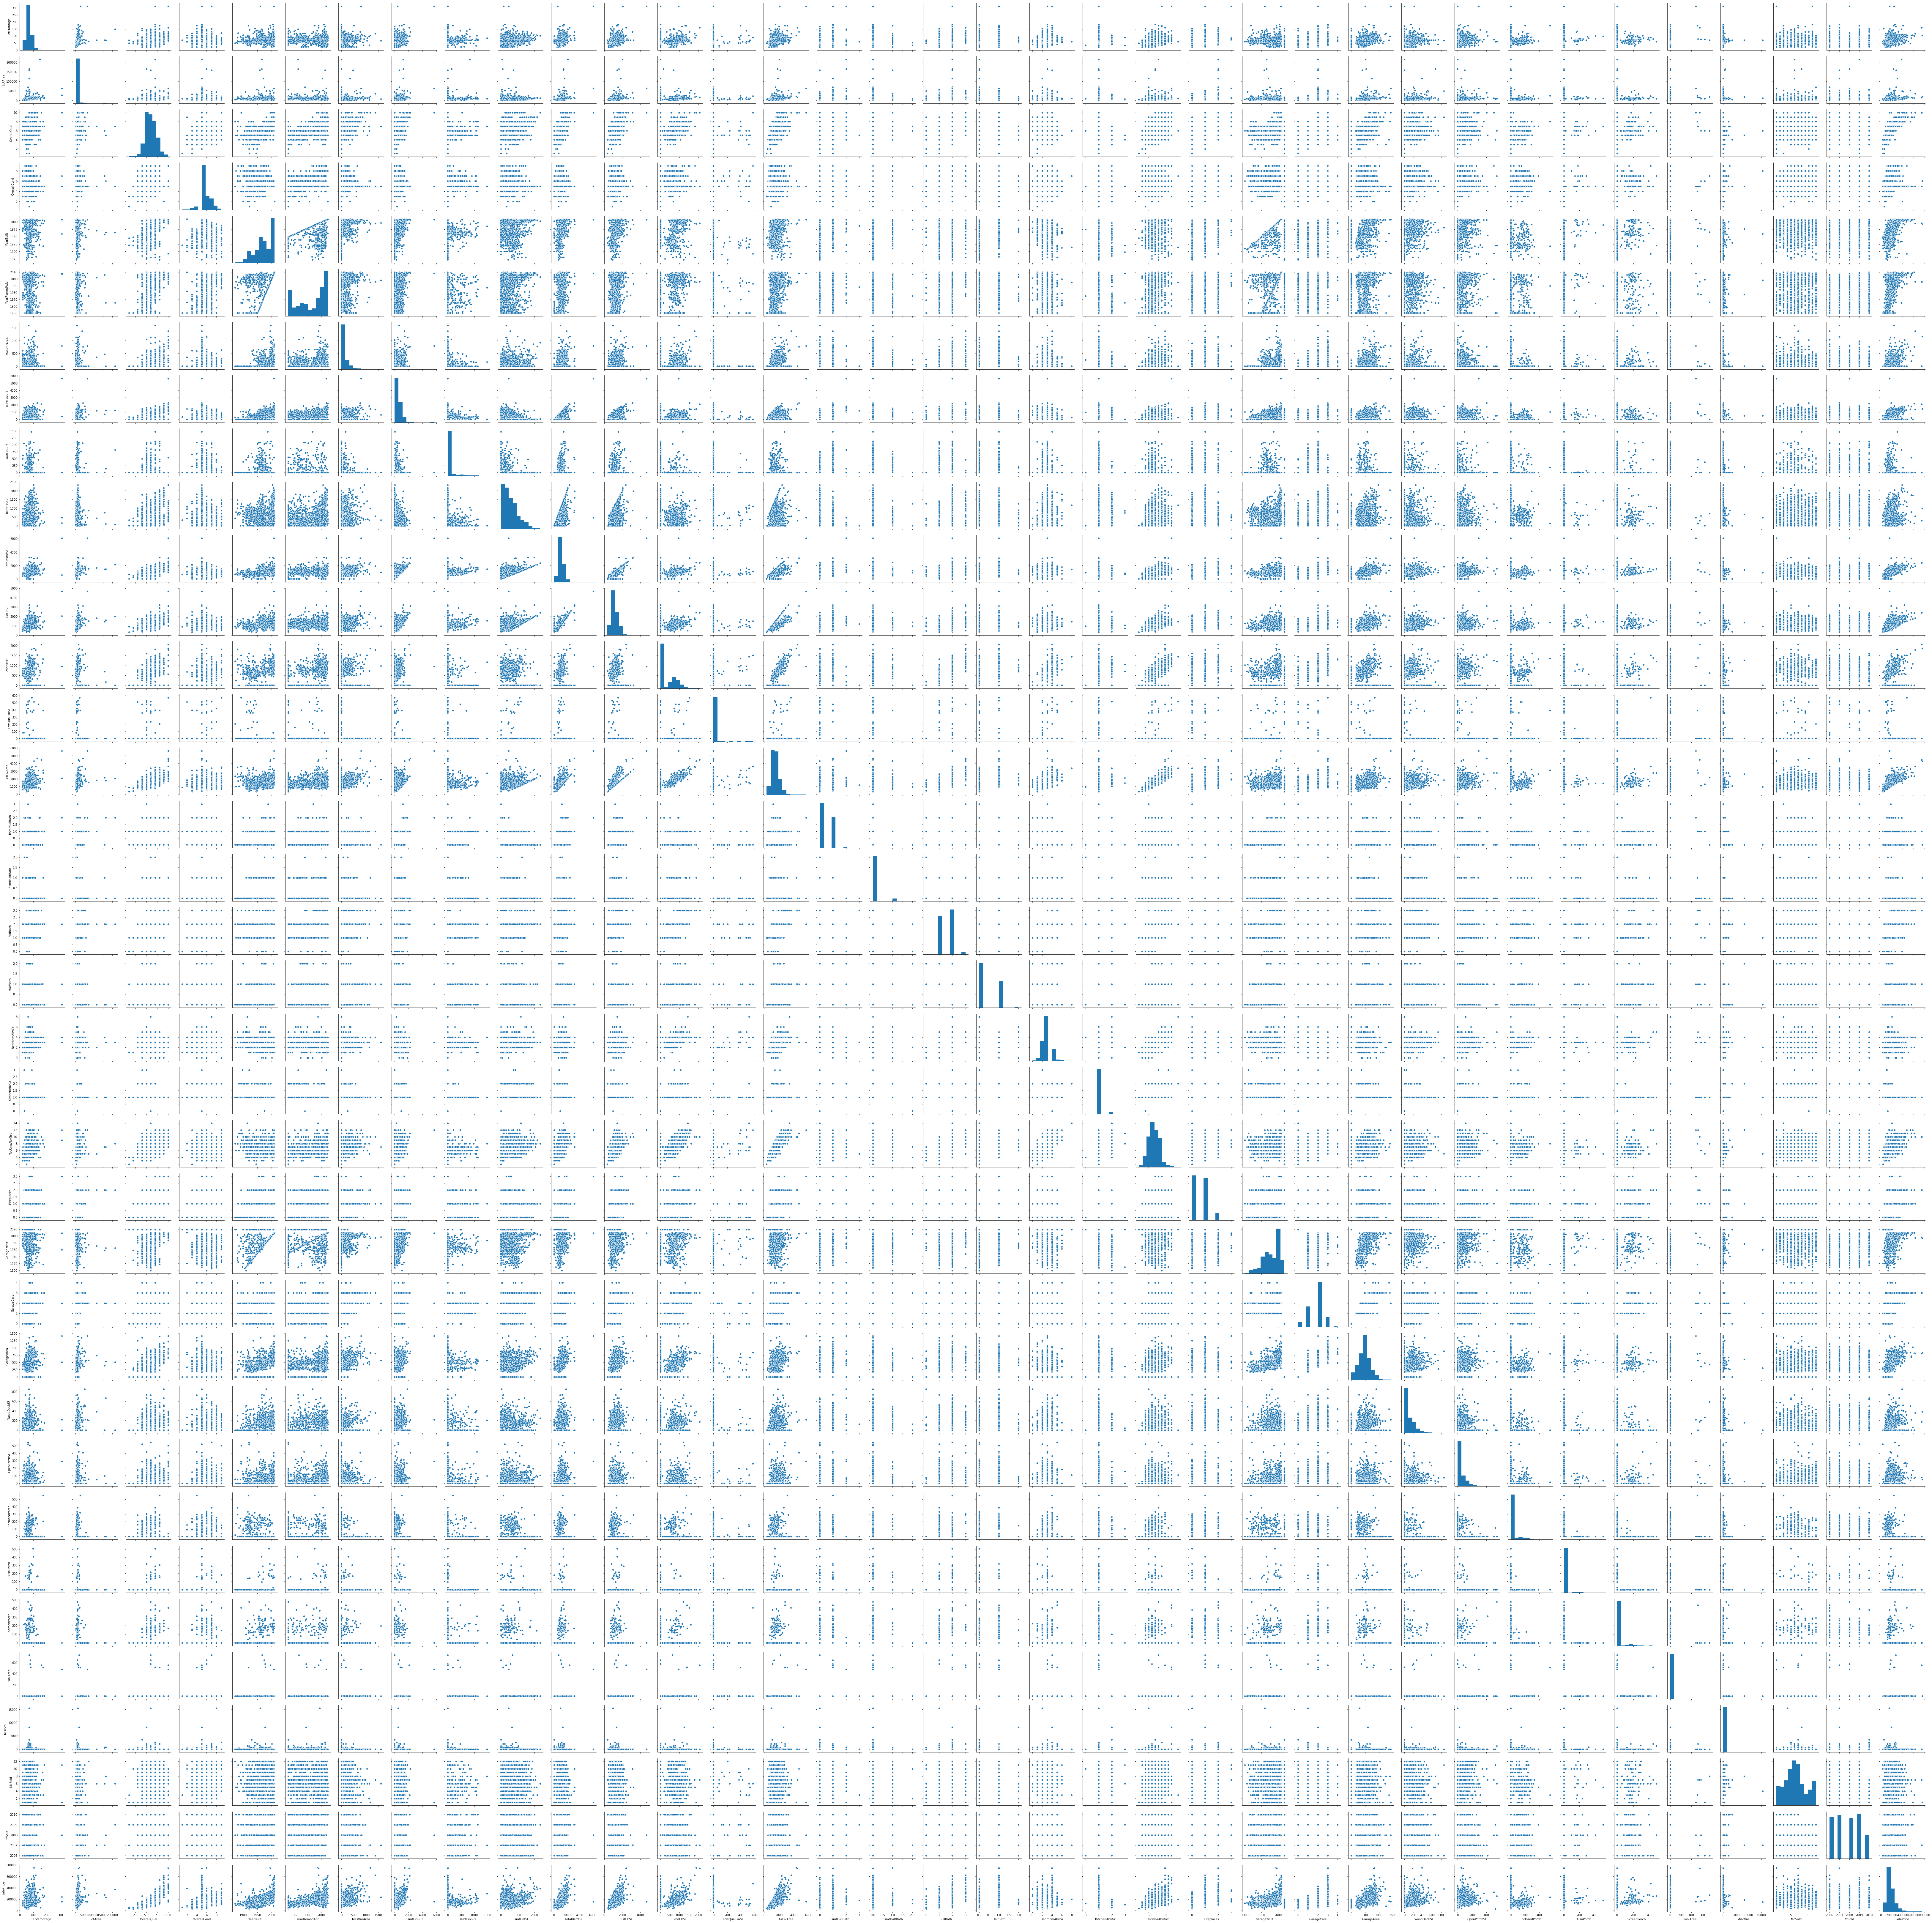

In [1364]:
# paiwise scatter plot for all numeric columns
sns.pairplot(housing_df_numeric)
plt.show()

In [1365]:
# correlation matrix
cor = housing_df_numeric.corr()
cor

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
LotFrontage       1.000000  0.306795     0.234196    -0.052820   0.117598   
LotArea           0.306795  1.000000     0.105806    -0.005636   0.014228   
OverallQual       0.234196  0.105806     1.000000    -0.091932   0.572323   
OverallCond      -0.052820 -0.005636    -0.091932     1.000000  -0.375983   
YearBuilt         0.117598  0.014228     0.572323    -0.375983   1.000000   
YearRemodAdd      0.082746  0.013788     0.550684     0.073741   0.592855   
MasVnrArea        0.178699  0.103321     0.407252    -0.125694   0.311600   
BsmtFinSF1        0.215828  0.214103     0.239666    -0.046231   0.249503   
BsmtFinSF2        0.043340  0.111170    -0.059119     0.040229  -0.049107   
BsmtUnfSF         0.122156 -0.002618     0.308159    -0.136841   0.149040   
TotalBsmtSF       0.363358  0.260833     0.537808    -0.171098   0.391452   
1stFlrSF          0.414266  0.299475     0.476224    -0.144203   0.281986   
2ndFlrSF          0.072483  0.050986     0.295493     0.028942   0.010308   
LowQualFinSF      0.036849  0.004779    -0.030429     0.025494  -0.183784   
GrLivArea         0.368392  0.263116     0.593007    -0.079686   0.199010   
BsmtFullBath      0.091481  0.158155     0.111098    -0.054942   0.187599   
BsmtHalfBath     -0.006419  0.048046    -0.040150     0.117821  -0.038162   
FullBath          0.180424  0.126031     0.550600    -0.194149   0.468271   
HalfBath          0.048258  0.014259     0.273458    -0.060769   0.242656   
BedroomAbvGr      0.237023  0.119690     0.101676     0.012980  -0.070651   
KitchenAbvGr     -0.005805 -0.017784    -0.183882    -0.087001  -0.174800   
TotRmsAbvGrd      0.320146  0.190015     0.427452    -0.057583   0.095589   
Fireplaces        0.235755  0.271364     0.396765    -0.023820   0.147716   
GarageYrBlt       0.025036 -0.049824     0.388760    -0.289078   0.644784   
GarageCars        0.269729  0.154871     0.600671    -0.185758   0.537850   
GarageArea        0.323663  0.180403     0.562022    -0.151521   0.478954   
WoodDeckSF        0.077106  0.171698     0.238923    -0.003334   0.224880   
OpenPorchSF       0.137454  0.084774     0.308819    -0.032589   0.188686   
EnclosedPorch     0.009790 -0.018340    -0.113937     0.070356  -0.387268   
3SsnPorch         0.062335  0.020423     0.030371     0.025504   0.031355   
ScreenPorch       0.037684  0.043160     0.064886     0.054811  -0.050364   
PoolArea          0.180868  0.077672     0.065166    -0.001985   0.004950   
MiscVal           0.001168  0.038068    -0.031406     0.068777  -0.034383   
MoSold            0.010158  0.001205     0.070815    -0.003511   0.012398   
YrSold            0.006768 -0.014261    -0.027347     0.043950  -0.013618   
SalePrice         0.334901  0.263843     0.790982    -0.077856   0.522897   

               YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
LotFrontage        0.082746    0.178699    0.215828    0.043340   0.122156   
LotArea            0.013788    0.103321    0.214103    0.111170  -0.002618   
OverallQual        0.550684    0.407252    0.239666   -0.059119   0.308159   
OverallCond        0.073741   -0.125694   -0.046231    0.040229  -0.136841   
YearBuilt          0.592855    0.311600    0.249503   -0.049107   0.149040   
YearRemodAdd       1.000000    0.176529    0.128451   -0.067759   0.181133   
MasVnrArea         0.176529    1.000000    0.261256   -0.071330   0.113862   
BsmtFinSF1         0.128451    0.261256    1.000000   -0.050117  -0.495251   
BsmtFinSF2        -0.067759   -0.071330   -0.050117    1.000000  -0.209294   
BsmtUnfSF          0.181133    0.113862   -0.495251   -0.209294   1.000000   
TotalBsmtSF        0.291066    0.360067    0.522396    0.104810   0.415360   
1stFlrSF           0.240379    0.339850    0.445863    0.097117   0.317987   
2ndFlrSF           0.140024    0.173800   -0.137079   -0.099260   0.004469   
LowQualFinSF      -0.062419   -0.068628   -0.064503    0.014807   0.02816

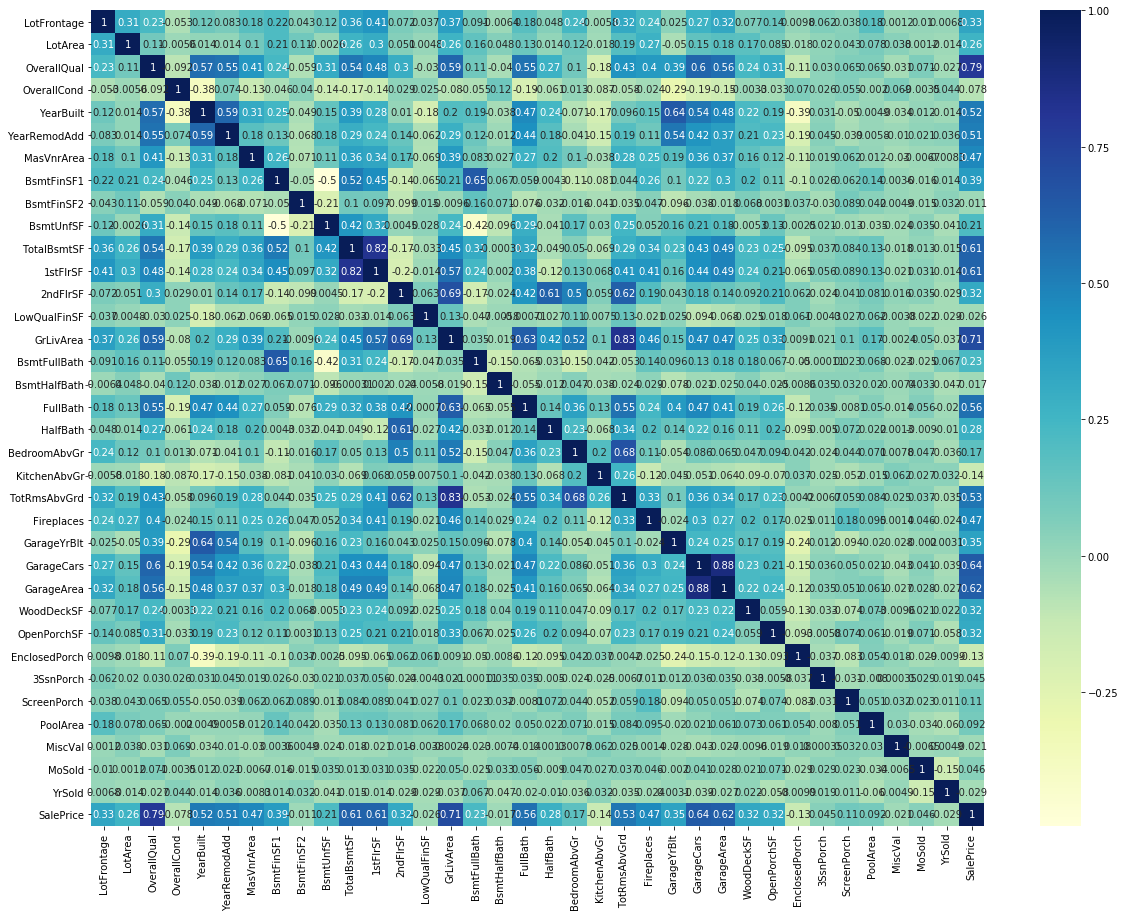

In [1366]:
# plotting correlations on a heatmap
# figure size
plt.figure(figsize = (20, 15))
# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

### Outlier treament

In [1367]:
# now let's drop some columns from numeric data frame to inspect outlier in each column
# As inspecting outlier on these column's doesn't make any sense
housing_df_numeric = housing_df_numeric.drop(['GarageYrBlt','YearBuilt','YrSold',
                                              'YearRemodAdd','MoSold','BsmtFullBath',
                                              'BsmtHalfBath','FullBath','HalfBath',
                                              'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd',
                                              'OverallQual','OverallQual','GarageCars',
                                              'OverallCond','Fireplaces'], axis=1)

In [1368]:
# Check data distribution in different columns to check outliers
housing_df_numeric.describe()

LotFrontage        LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     70.049958   10516.828082   103.117123   443.639726    46.549315   
std      22.024023    9981.264932   180.731373   456.098091   161.319273   
min      21.000000    1300.000000     0.000000     0.000000     0.000000   
25%      60.000000    7553.500000     0.000000     0.000000     0.000000   
50%      70.049958    9478.500000     0.000000   383.500000     0.000000   
75%      79.000000   11601.500000   164.250000   712.250000     0.000000   
max     313.000000  215245.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean   1515.463699   472.980137    94.244521    46.660274      21.954110   
std     525.480383   213.804841   125.338794    66.256028      61.119149   
min     334.000000     0.000000     0.000000     0.000000       0.000000   
25%    1129.500000   334.500000     0.000000     0.000000       0.000000   
50%    1464.000000   480.000000     0.000000    25.000000       0.000000   
75%    1776.750000   576.000000   168.000000    68.000000       0.000000   
max    5642.000000  1418.000000   857.000000   547.000000     552.000000   

         3SsnPorch  ScreenPorch     PoolArea       MiscVal      SalePrice  
count  1460.000000  1460.000000  1460.000000   1460.000000    1460.000000  
mean      3.409589    15.060959     2.758904     43.489041  180921.195890  
std      29.317331    55.757415    40.177307    496.123024   79442.502883  
min       0.000000     0.000000     0.000000      0.000000   34900.000000  
25%       0.000000     0.000000     0.000000      0.000000  129975.000000  
50%       0.000000     0.000000     0.000000      0.000000  163000.000000  
75%       0.000000     0.000000     0.000000      0.000000  214000.000000  
max     508.000000   480.000000   738.000000  15500.000000  755000.000000

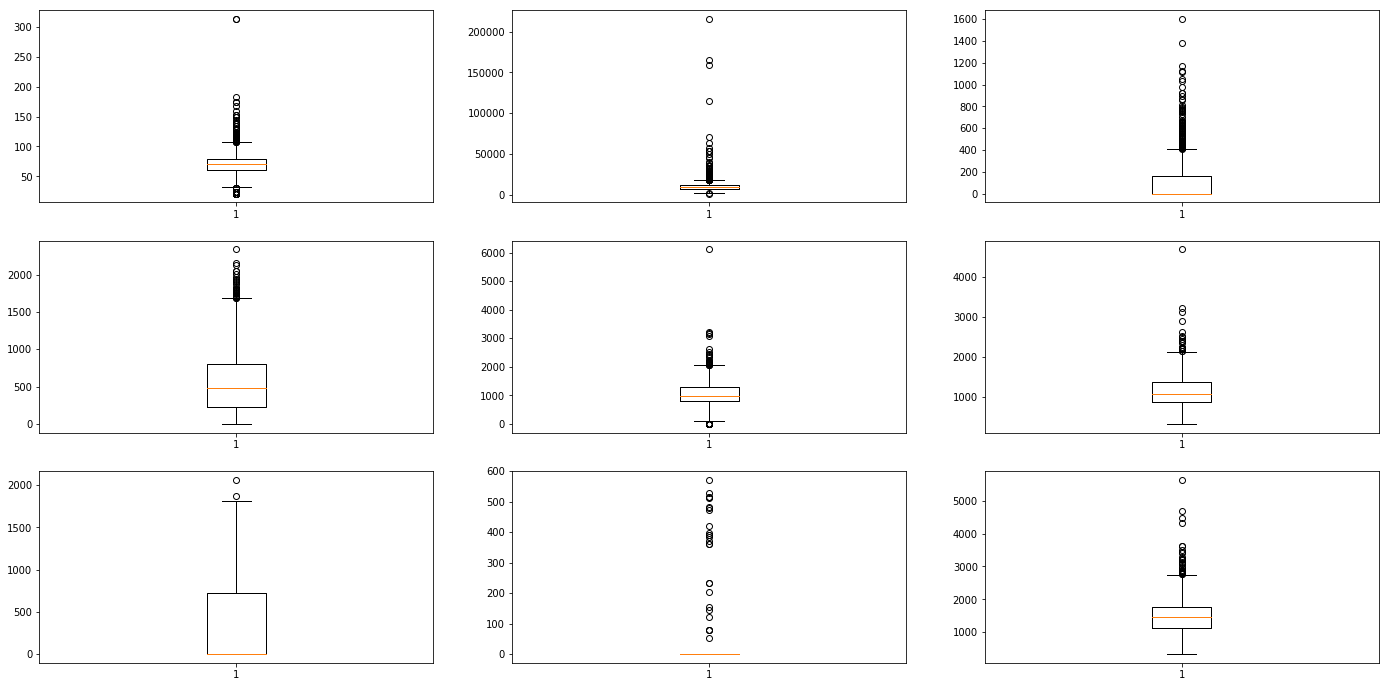

In [1369]:
plt.figure(figsize=(24, 12))
plt.subplot(3,3,1)
plt.boxplot(housing_df.LotFrontage)
plt.subplot(3,3,2)
plt.boxplot(housing_df.LotArea)
plt.subplot(3,3,3)
plt.boxplot(housing_df.MasVnrArea)
plt.subplot(3,3,4)
plt.boxplot(housing_df.BsmtUnfSF)
plt.subplot(3,3,5)
plt.boxplot(housing_df.TotalBsmtSF)
plt.subplot(3,3,6)
plt.boxplot(housing_df['1stFlrSF'])
plt.subplot(3,3,7)
plt.boxplot(housing_df['2ndFlrSF'])
plt.subplot(3,3,8)
plt.boxplot(housing_df.LowQualFinSF)
plt.subplot(3,3,9)
plt.boxplot(housing_df.GrLivArea)
plt.show()

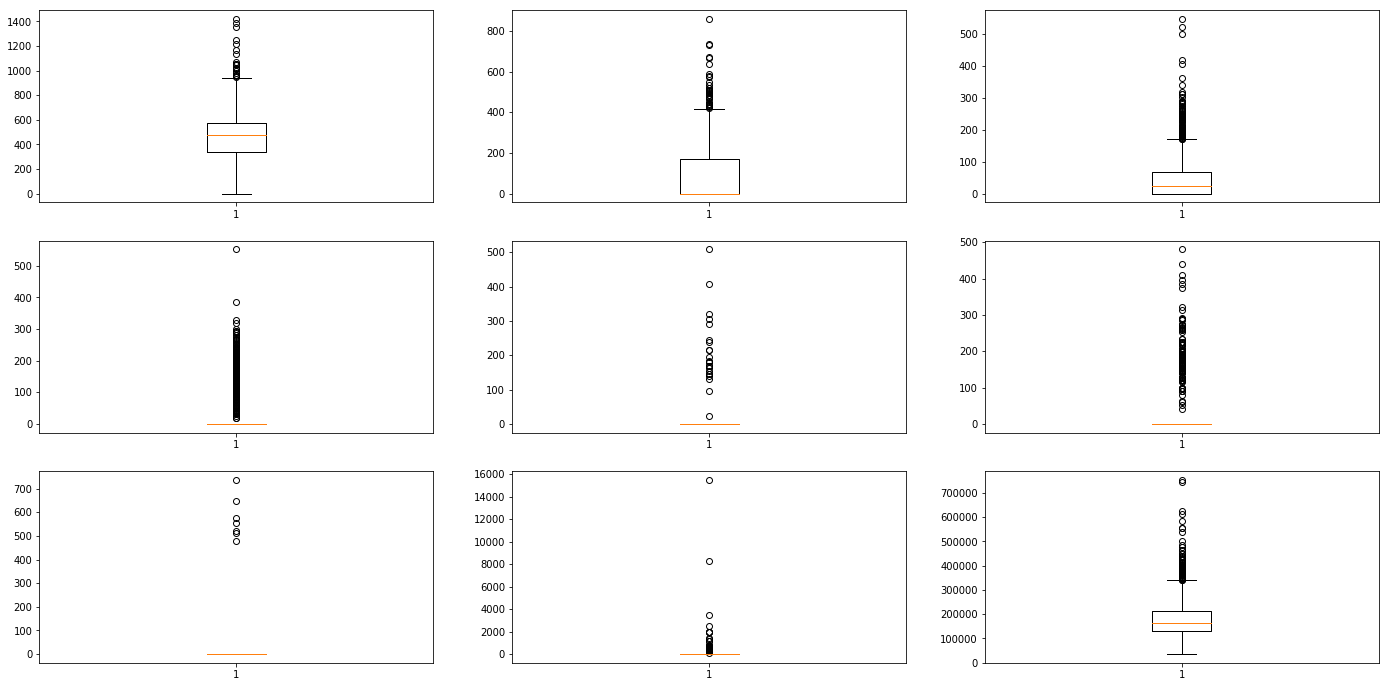

In [1370]:
plt.figure(figsize=(24, 12))
plt.subplot(3,3,1)
plt.boxplot(housing_df.GarageArea)
plt.subplot(3,3,2)
plt.boxplot(housing_df.WoodDeckSF)
plt.subplot(3,3,3)
plt.boxplot(housing_df.OpenPorchSF)
plt.subplot(3,3,4)
plt.boxplot(housing_df.EnclosedPorch)
plt.subplot(3,3,5)
plt.boxplot(housing_df['3SsnPorch'])
plt.subplot(3,3,6)
plt.boxplot(housing_df.ScreenPorch)
plt.subplot(3,3,7)
plt.boxplot(housing_df.PoolArea)
plt.subplot(3,3,8)
plt.boxplot(housing_df.MiscVal)
plt.subplot(3,3,9)
plt.boxplot(housing_df.SalePrice)
plt.show()

Now, as per data distribution and box plot there are outlier's in data but we can't treat outlier's in all columns as we have a small data set and plus outlier's in some columns make sense. So we will do outlier treatment for few columns only

Below we have done outlier treatment for LotFrontage, LotArea, PoolArea, MiscVal

In [1371]:
# outlier treatment for LotFrontage
Q1 = housing_df.LotFrontage.quantile(0.25)
Q3 = housing_df.LotFrontage.quantile(0.75)
IQR = Q3 - Q1
housing_df = housing_df[(housing_df.LotFrontage >= Q1 - 1.5*IQR) & (housing_df.LotFrontage <= Q3 + 1.5*IQR)]

In [1372]:
# outlier treatment for LotArea
Q1 = housing_df.LotArea.quantile(0.25)
Q3 = housing_df.LotArea.quantile(0.75)
IQR = Q3 - Q1
housing_df = housing_df[(housing_df.LotArea >= Q1 - 1.5*IQR) & (housing_df.LotArea <= Q3 + 1.5*IQR)]

In [1373]:
# outlier treatment for PoolArea
Q1 = housing_df.PoolArea.quantile(0.25)
Q3 = housing_df.PoolArea.quantile(0.75)
IQR = Q3 - Q1
housing_df = housing_df[(housing_df.PoolArea >= Q1 - 1.5*IQR) & (housing_df.PoolArea <= Q3 + 1.5*IQR)]

In [1374]:
# outlier treatment for MiscVal
Q1 = housing_df.MiscVal.quantile(0.25)
Q3 = housing_df.MiscVal.quantile(0.75)
IQR = Q3 - Q1
housing_df = housing_df[(housing_df.MiscVal >= Q1 - 1.5*IQR) & (housing_df.MiscVal <= Q3 + 1.5*IQR)]

In [1375]:
# Check number of row retained after outlier treatment
housing_df.shape

(1238, 77)

### Derive columns from original columns

In [1376]:
# We can derive age using year columns
# derive house age = 2019 - year build
housing_df["house_age"] = 2019 - housing_df["YearBuilt"]
# derive house age when sold in month as we have month and year both for sold house
housing_df["house_age_when_sold_in_month"] = (((housing_df["YrSold"]-1) - housing_df["YearBuilt"])*12) + housing_df["MoSold"]
# derive garage age = 2019 - year build
housing_df["garage_age"] = 2019 - housing_df["GarageYrBlt"]
# derive gap b/w house build and remodel = YearRemodAdd - year build
housing_df["gap_between_build_remodel"] = housing_df["YearRemodAdd"] - housing_df["YearBuilt"]

In [1377]:
# check data frame after deriving columns
housing_df.head()

MSSubClass MSZoning  LotFrontage  LotArea            Alley LotShape  \
0         60       RL         65.0     8450  No alley access      Reg   
1         20       RL         80.0     9600  No alley access      Reg   
2         60       RL         68.0    11250  No alley access      IR1   
3         70       RL         60.0     9550  No alley access      IR1   
4         60       RL         84.0    14260  No alley access      IR1   

  LandContour LotConfig LandSlope Neighborhood            ...             \
0         Lvl    Inside       Gtl      CollgCr            ...              
1         Lvl       FR2       Gtl      Veenker            ...              
2         Lvl    Inside       Gtl      CollgCr            ...              
3         Lvl    Corner       Gtl      Crawfor            ...              
4         Lvl       FR2       Gtl      NoRidge            ...              

  MiscVal MoSold YrSold SaleType  SaleCondition  SalePrice  house_age  \
0       0      2   2008       WD         Normal     208500         16   
1       0      5   2007       WD         Normal     181500         43   
2       0      9   2008       WD         Normal     223500         18   
3       0      2   2006       WD        Abnorml     140000        104   
4       0     12   2008       WD         Normal     250000         19   

   house_age_when_sold_in_month garage_age gap_between_build_remodel  
0                            50       16.0                         0  
1                           365       43.0                         0  
2                            81       18.0                         1  
3                          1082       21.0                        55  
4                            96       19.0                         0  

[5 rows x 81 columns]

In [1378]:
# Drop original year and month columns after deriving columns
housing_df = housing_df.drop(['GarageYrBlt','YearBuilt','YrSold','YearRemodAdd','MoSold'], axis=1)

In [1379]:
housing_df.shape

(1238, 76)

## Data preparation for model building

In [1380]:
# split into X and y
X = housing_df.drop(['SalePrice'], axis=1)
y = housing_df['SalePrice']

In [1381]:
X.head()

MSSubClass MSZoning  LotFrontage  LotArea            Alley LotShape  \
0         60       RL         65.0     8450  No alley access      Reg   
1         20       RL         80.0     9600  No alley access      Reg   
2         60       RL         68.0    11250  No alley access      IR1   
3         70       RL         60.0     9550  No alley access      IR1   
4         60       RL         84.0    14260  No alley access      IR1   

  LandContour LotConfig LandSlope Neighborhood            ...             \
0         Lvl    Inside       Gtl      CollgCr            ...              
1         Lvl       FR2       Gtl      Veenker            ...              
2         Lvl    Inside       Gtl      CollgCr            ...              
3         Lvl    Corner       Gtl      Crawfor            ...              
4         Lvl       FR2       Gtl      NoRidge            ...              

  PoolArea     Fence MiscFeature MiscVal  SaleType  SaleCondition house_age  \
0        0  No Fence        none       0        WD         Normal        16   
1        0  No Fence        none       0        WD         Normal        43   
2        0  No Fence        none       0        WD         Normal        18   
3        0  No Fence        none       0        WD        Abnorml       104   
4        0  No Fence        none       0        WD         Normal        19   

  house_age_when_sold_in_month garage_age gap_between_build_remodel  
0                           50       16.0                         0  
1                          365       43.0                         0  
2                           81       18.0                         1  
3                         1082       21.0                        55  
4                           96       19.0                         0  

[5 rows x 75 columns]

In [1382]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [1383]:
# creating dummy variables for yes/no categorical variables
# we'll map yes to 1 and no to 0
binary_vars_list =  ['CentralAir']

# defining the map function
def binary_map(x):
    return x.map({'Y': 1, "N": 0})

# applying the function to column with yes /no data
X[binary_vars_list] = X[binary_vars_list].apply(binary_map)
X.head()

MSSubClass MSZoning  LotFrontage  LotArea            Alley LotShape  \
0         60       RL         65.0     8450  No alley access      Reg   
1         20       RL         80.0     9600  No alley access      Reg   
2         60       RL         68.0    11250  No alley access      IR1   
3         70       RL         60.0     9550  No alley access      IR1   
4         60       RL         84.0    14260  No alley access      IR1   

  LandContour LotConfig LandSlope Neighborhood            ...             \
0         Lvl    Inside       Gtl      CollgCr            ...              
1         Lvl       FR2       Gtl      Veenker            ...              
2         Lvl    Inside       Gtl      CollgCr            ...              
3         Lvl    Corner       Gtl      Crawfor            ...              
4         Lvl       FR2       Gtl      NoRidge            ...              

  PoolArea     Fence MiscFeature MiscVal  SaleType  SaleCondition house_age  \
0        0  No Fence        none       0        WD         Normal        16   
1        0  No Fence        none       0        WD         Normal        43   
2        0  No Fence        none       0        WD         Normal        18   
3        0  No Fence        none       0        WD        Abnorml       104   
4        0  No Fence        none       0        WD         Normal        19   

  house_age_when_sold_in_month garage_age gap_between_build_remodel  
0                           50       16.0                         0  
1                          365       43.0                         0  
2                           81       18.0                         1  
3                         1082       21.0                        55  
4                           96       19.0                         0  

[5 rows x 75 columns]

In [1384]:
# seperate all categorical variables to create dummy variables
housing_df_categorical = X.select_dtypes(include=['object'])
housing_df_categorical.head()

MSSubClass MSZoning            Alley LotShape LandContour LotConfig  \
0         60       RL  No alley access      Reg         Lvl    Inside   
1         20       RL  No alley access      Reg         Lvl       FR2   
2         60       RL  No alley access      IR1         Lvl    Inside   
3         70       RL  No alley access      IR1         Lvl    Corner   
4         60       RL  No alley access      IR1         Lvl       FR2   

  LandSlope Neighborhood Condition1 Condition2      ...        FireplaceQu  \
0       Gtl      CollgCr       Norm       Norm      ...       No Fireplace   
1       Gtl      Veenker      Feedr       Norm      ...                 TA   
2       Gtl      CollgCr       Norm       Norm      ...                 TA   
3       Gtl      Crawfor       Norm       Norm      ...                 Gd   
4       Gtl      NoRidge       Norm       Norm      ...                 TA   

  GarageType GarageFinish GarageQual GarageCond PavedDrive     Fence  \
0     Attchd          RFn         TA         TA          Y  No Fence   
1     Attchd          RFn         TA         TA          Y  No Fence   
2     Attchd          RFn         TA         TA          Y  No Fence   
3     Detchd          Unf         TA         TA          Y  No Fence   
4     Attchd          RFn         TA         TA          Y  No Fence   

  MiscFeature SaleType SaleCondition  
0        none       WD        Normal  
1        none       WD        Normal  
2        none       WD        Normal  
3        none       WD       Abnorml  
4        none       WD        Normal  

[5 rows x 40 columns]

In [1385]:
# convert categorical variables into dummies
housing_df_dummies = pd.get_dummies(housing_df_categorical, drop_first=True)
housing_df_dummies.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

           ...            SaleType_ConLI  SaleType_ConLw  SaleType_New  \
0          ...                         0               0             0   
1          ...                         0               0             0   
2          ...                         0               0             0   
3          ...                         0               0             0   
4          ...                         0               0             0   

   SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0             0            1                      0                     0   
1             0            1                      0                     0   
2             0            1                      0                     0   
3             0            1                      0                     0   
4             0            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 220 columns]

In [1386]:
# drop original categorical variables after creating dummies
X = X.drop(list(housing_df_categorical.columns), axis=1)

In [1387]:
# concat dummy variables with X
X = pd.concat([X, housing_df_dummies], axis=1)

In [1388]:
X.shape

(1238, 255)

In [1389]:
X.head()

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0         65.0     8450            7            5       196.0         706   
1         80.0     9600            6            8         0.0         978   
2         68.0    11250            7            5       162.0         486   
3         60.0     9550            7            5         0.0         216   
4         84.0    14260            8            5       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  CentralAir          ...            \
0           0        150          856           1          ...             
1           0        284         1262           1          ...             
2           0        434          920           1          ...             
3           0        540          756           1          ...             
4           0        490         1145           1          ...             

   SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0               0             0             0            1   
1               0               0             0             0            1   
2               0               0             0             0            1   
3               0               0             0             0            1   
4               0               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 255 columns]

In [1390]:
# Scale data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_var = X.columns
X[scale_var] = scaler.fit_transform(X[scale_var])

In [1391]:
# Check data after scaling
X.describe()

LotFrontage      LotArea  OverallQual  OverallCond   MasVnrArea  \
count  1238.000000  1238.000000  1238.000000  1238.000000  1238.000000   
mean      0.490261     0.486092     0.565967     0.571789     0.061637   
std       0.194104     0.193634     0.152334     0.138228     0.107650   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.373333     0.366691     0.444444     0.500000     0.000000   
50%       0.507333     0.481141     0.555556     0.500000     0.000000   
75%       0.613333     0.608950     0.666667     0.625000     0.100000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

        BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF   CentralAir  \
count  1238.000000  1238.000000  1238.000000  1238.000000  1238.000000   
mean      0.197190     0.028835     0.247771     0.328368     0.930533   
std       0.193850     0.102369     0.190541     0.126750     0.254349   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.102419     0.252027     1.000000   
50%       0.174132     0.000000     0.208690     0.309576     1.000000   
75%       0.324954     0.000000     0.347817     0.397848     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               ...            SaleType_ConLI  SaleType_ConLw  SaleType_New  \
count          ...               1238.000000     1238.000000   1238.000000   
mean           ...                  0.003231        0.004039      0.086430   
std            ...                  0.056773        0.063449      0.281111   
min            ...                  0.000000        0.000000      0.000000   
25%            ...                  0.000000        0.000000      0.000000   
50%            ...                  0.000000        0.000000      0.000000   
75%            ...                  0.000000        0.000000      0.000000   
max            ...                  1.000000        1.000000      1.000000   

       SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count   1238.000000  1238.000000            1238.000000           1238.000000   
mean       0.002423     0.863489               0.003231              0.007270   
std        0.049187     0.343469               0.056773              0.084987   
min        0.000000     0.000000               0.000000              0.000000   
25%        0.000000     1.000000               0.000000              0.000000   
50%        0.000000     1.000000               0.000000              0.000000   
75%        0.000000     1.000000               0.000000              0.000000   
max        1.000000     1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count           1238.000000           1238.000000            1238.000000  
mean               0.014540              0.818255               0.088045  
std                0.119749              0.385790               0.283475  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 255 columns]

## Model building

In [1392]:
# split data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 1)

In [1393]:
# let's build a Linear regression model first
from sklearn import metrics
# linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.945077662186729

In [1394]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-2985069696448516.5

In [1395]:
# model coefficients
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -21182.955),
 ('LotFrontage', 3413.423),
 ('LotArea', 33324.848),
 ('OverallQual', 65880.129),
 ('OverallCond', 46549.866),
 ('MasVnrArea', 19932.574),
 ('BsmtFinSF1', 4.270166786511628e+16),
 ('BsmtFinSF2', 2.8767028534337492e+16),
 ('BsmtUnfSF', 4.559008049945269e+16),
 ('TotalBsmtSF', -6.256926287716916e+16),
 ('CentralAir', 59.5),
 ('1stFlrSF', 2836157385415179.0),
 ('2ndFlrSF', 1578800811320750.0),
 ('LowQualFinSF', 517446820831435.5),
 ('GrLivArea', -3050780214371366.0),
 ('BsmtFullBath', 764.125),
 ('BsmtHalfBath', 85.0),
 ('FullBath', 12195.0),
 ('HalfBath', 5018.0),
 ('BedroomAbvGr', -35660.0),
 ('KitchenAbvGr', -19367.5),
 ('TotRmsAbvGrd', 12515.5),
 ('Fireplaces', 11430.0),
 ('GarageCars', 27382.0),
 ('GarageArea', 2542.0),
 ('WoodDeckSF', 8913.0),
 ('OpenPorchSF', 6807.0),
 ('EnclosedPorch', 13280.0),
 ('3SsnPorch', 15085.0),
 ('ScreenPorch', 11335.25),
 ('PoolArea', -2744013787854427.0),
 ('MiscVal', 1.2134892600628124e+16),
 ('house_age', -4866.0),
 ('house_

### Lasso regression

In [1396]:
# lasso regression without tuning hyper parameter
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9450703893776525
0.9174166858400341


In [1397]:
# lasso model parameters without tuning hyper parameter
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -21026.866),
 ('LotFrontage', 3382.319),
 ('LotArea', 33398.338),
 ('OverallQual', 65728.164),
 ('OverallCond', 46517.257),
 ('MasVnrArea', 19824.279),
 ('BsmtFinSF1', 76644.992),
 ('BsmtFinSF2', 28268.186),
 ('BsmtUnfSF', 31800.387),
 ('TotalBsmtSF', 32398.632),
 ('CentralAir', 145.574),
 ('1stFlrSF', 107207.986),
 ('2ndFlrSF', 79700.788),
 ('LowQualFinSF', 15196.791),
 ('GrLivArea', 25492.748),
 ('BsmtFullBath', 651.844),
 ('BsmtHalfBath', 67.339),
 ('FullBath', 12002.83),
 ('HalfBath', 4901.651),
 ('BedroomAbvGr', -35530.667),
 ('KitchenAbvGr', -19548.65),
 ('TotRmsAbvGrd', 12728.818),
 ('Fireplaces', 11266.472),
 ('GarageCars', 27438.078),
 ('GarageArea', 2507.421),
 ('WoodDeckSF', 8818.183),
 ('OpenPorchSF', 6965.536),
 ('EnclosedPorch', 13420.314),
 ('3SsnPorch', 14973.139),
 ('ScreenPorch', 11280.102),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('house_age', -29952.139),
 ('house_age_when_sold_in_month', -56684.825),
 ('garage_age', 885.517),
 ('gap_between_build_remo

In [1398]:
# Now let's do k fold with r2 score and tune hyper parameter
# grid search CV
from sklearn.model_selection import KFold
# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200]}

# grid search
# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   12.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [1399]:
# results data frame 
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.104238      0.018315         0.001189        0.000236      0.0001   
1       0.100825      0.010436         0.001084        0.000054       0.001   
2       0.097239      0.009919         0.001075        0.000038        0.01   
3       0.098065      0.009973         0.001063        0.000044        0.05   
4       0.097191      0.010213         0.001120        0.000135         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.892857           0.904077           0.884765   
1   {'alpha': 0.001}           0.892866           0.904090           0.884771   
2    {'alpha': 0.01}           0.892957           0.904170           0.884831   
3    {'alpha': 0.05}           0.893377           0.904390           0.885156   
4     {'alpha': 0.1}           0.893868           0.904640           0.885530   

   split3_test_score       ...         mean_test_score  std_test_score  \
0           0.887166       ...                0.890666        0.007350   
1           0.887172       ...                0.890674        0.007354   
2           0.887231       ...                0.890738        0.007368   
3           0.887422       ...                0.890988        0.007388   
4           0.887454       ...                0.891241        0.007430   

   rank_test_score  split0_train_score  split1_train_score  \
0               27            0.946465            0.945466   
1               26            0.946465            0.945466   
2               25            0.946465            0.945466   
3               24            0.946465            0.945464   
4               23            0.946464            0.945462   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.947946            0.950362            0.954408   
1            0.947946            0.950362            0.954408   
2            0.947945            0.950362            0.954408   
3            0.947944            0.950362            0.954408   
4            0.947942            0.950361            0.954407   

   mean_train_score  std_train_score  
0          0.948929         0.003197  
1          0.948929         0.003197  
2          0.948929         0.003197  
3          0.948929         0.003197  
4          0.948927         0.003198  

[5 rows x 21 columns]

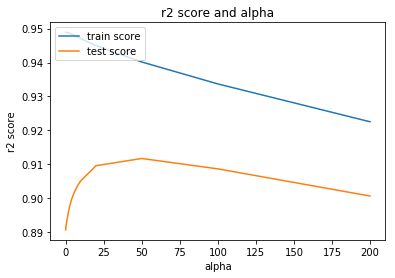

In [1400]:
# plot to choose optimal value of aplha / hyper parameter
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.title("r2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1401]:
# Now let's do k fold with neg_mean_absolute_error score and tune hyper parameter
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   13.0s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [1402]:
# results data frame
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.108020      0.013790         0.001152        0.000084      0.0001   
1       0.107136      0.007799         0.001006        0.000051       0.001   
2       0.112837      0.011516         0.001168        0.000210        0.01   
3       0.108478      0.013871         0.001133        0.000079        0.05   
4       0.106385      0.011126         0.001161        0.000159         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -15342.554915      -17622.200750      -16201.787657   
1   {'alpha': 0.001}      -15342.322165      -17623.030466      -16201.358070   
2    {'alpha': 0.01}      -15339.079657      -17621.644530      -16197.010350   
3    {'alpha': 0.05}      -15322.009079      -17598.717207      -16174.836882   
4     {'alpha': 0.1}      -15300.836718      -17574.524118      -16147.875283   

   split3_test_score       ...         mean_test_score  std_test_score  \
0      -15262.334365       ...           -16755.070293     1548.991231   
1      -15261.903766       ...           -16754.933803     1549.100058   
2      -15257.597771       ...           -16751.682081     1549.681403   
3      -15242.871488       ...           -16734.274040     1551.260612   
4      -15239.524787       ...           -16716.639613     1550.844053   

   rank_test_score  split0_train_score  split1_train_score  \
0               27       -11407.971762       -11021.045513   
1               26       -11407.968991       -11021.044136   
2               25       -11407.963738       -11021.117878   
3               24       -11408.227998       -11021.658353   
4               23       -11409.028172       -11022.477748   

   split2_train_score  split3_train_score  split4_train_score  \
0       -11352.706080       -11344.619475       -10243.022083   
1       -11352.721448       -11344.626826       -10243.032744   
2       -11353.026366       -11344.840196       -10243.296694   
3       -11354.482172       -11345.809363       -10244.617318   
4       -11356.296893       -11347.245360       -10246.451226   

   mean_train_score  std_train_score  
0     -11073.872983       437.213338  
1     -11073.878829       437.211766  
2     -11074.048974       437.174197  
3     -11074.959041       437.005633  
4     -11076.299880       436.821132  

[5 rows x 21 columns]

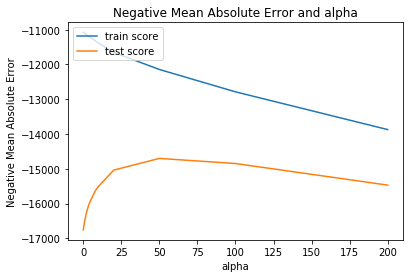

In [1403]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1404]:
# model with optimal alpha = 50
# lasso regression
lm = Lasso(alpha=50)
lm.fit(X_train, y_train)


# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9372405328256925
0.9254664123086983


In [1405]:
# lasso model parameters with alpha = 50
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 34537.742),
 ('LotFrontage', 3872.558),
 ('LotArea', 29770.784),
 ('OverallQual', 72106.058),
 ('OverallCond', 48369.881),
 ('MasVnrArea', 15037.914),
 ('BsmtFinSF1', 40212.291),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 61327.238),
 ('CentralAir', 1114.809),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -12276.386),
 ('GrLivArea', 155946.426),
 ('BsmtFullBath', 1772.246),
 ('BsmtHalfBath', -0.0),
 ('FullBath', 9646.831),
 ('HalfBath', 6139.135),
 ('BedroomAbvGr', -20570.459),
 ('KitchenAbvGr', -9607.097),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', 7345.959),
 ('GarageCars', 23977.678),
 ('GarageArea', 4294.87),
 ('WoodDeckSF', 5681.621),
 ('OpenPorchSF', 4470.058),
 ('EnclosedPorch', 2942.501),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 6203.506),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('house_age', -41417.318),
 ('house_age_when_sold_in_month', -23876.709),
 ('garage_age', -370.002),
 ('gap_between_build_remodel', 9813.314),
 ('MSSubClass_30', 0.

### Ridge Regression

In [1406]:
# ridge regression without tuning hyper parameter
lm = Ridge(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9450776066175754
0.9174397805219932


In [1407]:
ridge.fit(X_train, y_train)
ridge.coef_

array([ 5.36495726e+03,  3.00042535e+04,  6.06428746e+04,  4.08426819e+04,
        1.95751766e+04,  5.18426556e+04,  9.84250408e+03,  1.15809135e+04,
        4.83445401e+04,  2.64213150e+03,  5.44882163e+04,  4.13710985e+04,
       -4.74095392e+03,  7.12606855e+04,  3.17078527e+03, -8.89086741e+02,
        1.67677150e+04,  8.66564792e+03, -2.37233103e+04, -1.44583696e+04,
        1.53065193e+04,  1.24817090e+04,  2.29861612e+04,  1.07298259e+04,
        8.32798412e+03,  8.45710539e+03,  8.55675071e+03,  1.22215619e+04,
        1.01632000e+04,  0.00000000e+00,  0.00000000e+00, -3.18596767e+04,
       -3.38708416e+04,  1.64788256e+03,  1.34544582e+04,  8.98904638e+02,
        7.57258605e+03,  3.57013131e+03,  2.93797917e+03,  3.46979097e+03,
        3.04556089e+03, -1.28469968e+03, -3.02842059e+03, -1.11131683e+03,
       -8.85341139e+03, -4.63554478e+03, -1.22793720e+04, -1.03058649e+03,
       -4.62215322e+03,  2.53505633e+04,  1.33964456e+04,  1.02104241e+04,
        7.65069834e+03,  

In [1408]:
# Now let's do k fold with r2 score and tune hyper parameter

# list of alphas to tune
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [1409]:
# results data frame
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.004721      0.000901         0.000895        0.000074       0.001   
1       0.003930      0.000441         0.000828        0.000037        0.01   
2       0.004002      0.000230         0.000926        0.000196           1   
3       0.003545      0.000175         0.000918        0.000155           5   
4       0.004632      0.000316         0.000997        0.000191          10   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}           0.907217           0.872546           0.881687   
1   {'alpha': 0.01}           0.908513           0.874109           0.884074   
2    {'alpha': 1.0}           0.920342           0.901581           0.915891   
3    {'alpha': 5.0}           0.913246           0.907666           0.925983   
4   {'alpha': 10.0}           0.901223           0.904704           0.923781   

   split3_test_score       ...         mean_test_score  std_test_score  \
0           0.858353       ...                0.881639        0.016277   
1           0.859853       ...                0.883215        0.016182   
2           0.873974       ...                0.903368        0.016217   
3           0.867103       ...                0.903531        0.019711   
4           0.854455       ...                0.895874        0.022810   

   rank_test_score  split0_train_score  split1_train_score  \
0                5            0.945724            0.951815   
1                4            0.945716            0.951809   
2                2            0.942769            0.948502   
3                1            0.932826            0.937906   
4                3            0.922252            0.926842   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.948995            0.953377            0.946692   
1            0.948970            0.953369            0.946675   
2            0.944992            0.950582            0.943936   
3            0.933739            0.941259            0.934798   
4            0.922133            0.931534            0.925148   

   mean_train_score  std_train_score  
0          0.949321         0.002920  
1          0.949308         0.002922  
2          0.946156         0.002927  
3          0.936106         0.003094  
4          0.925582         0.003470  

[5 rows x 21 columns]

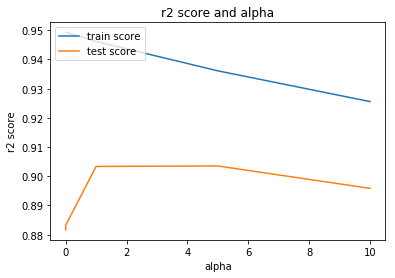

In [1410]:
# plotting mean test and train scoes with alpha to tune hyper parameter
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.title("r2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1411]:
# Now let's do k fold with neg_mean_absolute_error score and tune hyper parameter

# list of alphas to tune
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [1412]:
# results data frame
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.004095      0.000823         0.000879        0.000132       0.001   
1       0.003568      0.000368         0.000775        0.000049        0.01   
2       0.003497      0.000070         0.000793        0.000115           1   
3       0.003625      0.000097         0.000816        0.000080           5   
4       0.003583      0.000141         0.000858        0.000120          10   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}      -15800.068603      -18045.945189      -18958.830971   
1   {'alpha': 0.01}      -15695.675682      -17929.331030      -18763.189016   
2    {'alpha': 1.0}      -14580.124813      -15418.828566      -15888.591967   
3    {'alpha': 5.0}      -14841.211005      -14962.018781      -15036.619673   
4   {'alpha': 10.0}      -15500.441119      -15179.573242      -15199.015982   

   split3_test_score       ...         mean_test_score  std_test_score  \
0      -17516.493642       ...           -17393.313824     1094.532190   
1      -17408.384244       ...           -17266.510669     1067.774537   
2      -16212.234627       ...           -15414.165577      592.282637   
3      -16477.489639       ...           -15205.606554      645.492220   
4      -17050.404943       ...           -15676.844216      698.955694   

   rank_test_score  split0_train_score  split1_train_score  \
0                5       -11160.687358       -10839.216631   
1                4       -11164.921866       -10843.313961   
2                2       -11470.572016       -11223.173063   
3                1       -12469.100395       -12210.954296   
4                3       -13500.447135       -13238.037927   

   split2_train_score  split3_train_score  split4_train_score  \
0       -10663.174751       -11019.785288       -11583.631076   
1       -10670.943747       -11020.763731       -11584.954717   
2       -11077.790558       -11295.377967       -11805.687510   
3       -12196.212304       -12311.919994       -12585.391983   
4       -13271.489934       -13220.855943       -13449.419844   

   mean_train_score  std_train_score  
0     -11053.299021       313.667253  
1     -11056.979604       311.896628  
2     -11374.520223       249.939645  
3     -12354.715794       150.942072  
4     -13336.050157       115.691987  

[5 rows x 21 columns]

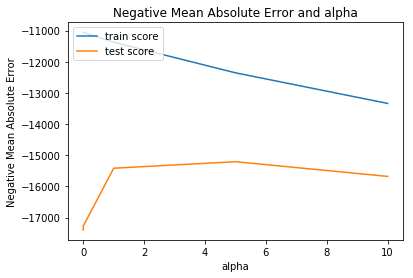

In [1413]:
# plotting mean test and train scoes with alpha to tune hyper parameter
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1414]:
# model with optimal alpha = 4
# ridge regression
lm = Ridge(alpha=4)
lm.fit(X_train, y_train)


# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9371096095852764
0.9253982765709686


In [1415]:
# coefficients for optimal value of alpha = 4
ridge.fit(X_train, y_train)
ridge.coef_

array([ 5.36495726e+03,  3.00042535e+04,  6.06428746e+04,  4.08426819e+04,
        1.95751766e+04,  5.18426556e+04,  9.84250408e+03,  1.15809135e+04,
        4.83445401e+04,  2.64213150e+03,  5.44882163e+04,  4.13710985e+04,
       -4.74095392e+03,  7.12606855e+04,  3.17078527e+03, -8.89086741e+02,
        1.67677150e+04,  8.66564792e+03, -2.37233103e+04, -1.44583696e+04,
        1.53065193e+04,  1.24817090e+04,  2.29861612e+04,  1.07298259e+04,
        8.32798412e+03,  8.45710539e+03,  8.55675071e+03,  1.22215619e+04,
        1.01632000e+04,  0.00000000e+00,  0.00000000e+00, -3.18596767e+04,
       -3.38708416e+04,  1.64788256e+03,  1.34544582e+04,  8.98904638e+02,
        7.57258605e+03,  3.57013131e+03,  2.93797917e+03,  3.46979097e+03,
        3.04556089e+03, -1.28469968e+03, -3.02842059e+03, -1.11131683e+03,
       -8.85341139e+03, -4.63554478e+03, -1.22793720e+04, -1.03058649e+03,
       -4.62215322e+03,  2.53505633e+04,  1.33964456e+04,  1.02104241e+04,
        7.65069834e+03,  

### Ridge regression after variable shrinkage done by lasso

In [1416]:
# let's take new X with all variables whose coefficient is not zero after lasso regression
X_new = X[['LotFrontage','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','TotalBsmtSF',
'CentralAir','LowQualFinSF','GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',
 'KitchenAbvGr','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
 'EnclosedPorch','ScreenPorch','house_age','house_age_when_sold_in_month','garage_age',
'gap_between_build_remodel','MSSubClass_45','MSSubClass_50','MSSubClass_60','MSSubClass_90',
'MSSubClass_120','MSSubClass_160','MSZoning_FV','MSZoning_RL','MSZoning_RM',
 'Alley_No alley access','LotShape_Reg','LandContour_Low','LotConfig_CulDSac','LotConfig_FR2',
 'LotConfig_Inside','LandSlope_Mod','Neighborhood_BrkSide','Neighborhood_CollgCr',
 'Neighborhood_Crawfor','Neighborhood_Edwards','Neighborhood_Gilbert','Neighborhood_Mitchel',
'Neighborhood_NAmes','Neighborhood_NWAmes','Neighborhood_NoRidge','Neighborhood_NridgHt',
'Neighborhood_OldTown','Neighborhood_StoneBr','Neighborhood_Timber','Condition1_Feedr',
 'Condition1_Norm','Condition1_PosA','Condition1_PosN','Condition1_RRAe','BldgType_2fmCon',
'BldgType_Duplex','BldgType_Twnhs','BldgType_TwnhsE','HouseStyle_1Story','HouseStyle_2.5Fin',
'HouseStyle_2.5Unf','HouseStyle_2Story','HouseStyle_SFoyer','RoofStyle_Gable',
 'RoofStyle_Mansard','Exterior1st_BrkFace','Exterior1st_HdBoard','Exterior1st_MetalSd',
'Exterior1st_Plywood','Exterior1st_Wd Sdng','Exterior2nd_VinylSd','Exterior2nd_Wd Sdng',
 'Exterior2nd_Wd Shng','Exterior2nd_CmentBd','Exterior2nd_Plywood','Exterior2nd_Stucco',
'Exterior2nd_VinylSd','Exterior2nd_Wd Sdng','Exterior2nd_Wd Shng','MasVnrType_None',
 'MasVnrType_Stone','ExterQual_Fa','ExterQual_Gd','ExterQual_TA','ExterCond_Gd',
 'Foundation_PConc','BsmtQual_Fa','BsmtQual_Gd','BsmtQual_TA','BsmtExposure_Gd',
 'BsmtExposure_No','BsmtFinType1_BLQ','BsmtFinType1_GLQ','BsmtFinType1_LwQ','BsmtFinType1_Rec',
'BsmtFinType1_Unf','BsmtFinType2_LwQ','BsmtFinType2_Unf','Heating_GasA','HeatingQC_Fa',
'HeatingQC_Gd','HeatingQC_TA','Electrical_FuseF','KitchenQual_Fa','KitchenQual_Gd',
 'KitchenQual_TA','Functional_Mod','Functional_Typ','FireplaceQu_Fa','FireplaceQu_Gd',
 'FireplaceQu_Po','GarageType_Attchd','GarageType_BuiltIn','GarageType_Detchd',
 'GarageType_No Garage','GarageFinish_RFn','GarageQual_Fa','GarageQual_Gd','GarageQual_No Garage',
'GarageCond_Fa','GarageCond_No Garage','PavedDrive_P','PavedDrive_Y','Fence_GdWo','Fence_MnPrv',
 'Fence_No Fence','SaleType_WD','SaleCondition_Alloca','SaleCondition_Family',
 'SaleCondition_Normal','SaleCondition_Partial']]


In [1417]:
# check shape for new X
X_new.shape

(1238, 137)

In [1418]:
# Check data distribution for new X to check if all the data is scaled 
X_new.describe()

LotFrontage      LotArea  OverallQual  OverallCond   MasVnrArea  \
count  1238.000000  1238.000000  1238.000000  1238.000000  1238.000000   
mean      0.490261     0.486092     0.565967     0.571789     0.061637   
std       0.194104     0.193634     0.152334     0.138228     0.107650   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.373333     0.366691     0.444444     0.500000     0.000000   
50%       0.507333     0.481141     0.555556     0.500000     0.000000   
75%       0.613333     0.608950     0.666667     0.625000     0.100000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

        BsmtFinSF1  TotalBsmtSF   CentralAir  LowQualFinSF    GrLivArea  \
count  1238.000000  1238.000000  1238.000000   1238.000000  1238.000000   
mean      0.197190     0.328368     0.930533      0.009690     0.372755   
std       0.193850     0.126750     0.254349      0.086552     0.154419   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.000000     0.252027     1.000000      0.000000     0.254176   
50%       0.174132     0.309576     1.000000      0.000000     0.360424   
75%       0.324954     0.397848     1.000000      0.000000     0.460649   
max       1.000000     1.000000     1.000000      1.000000     1.000000   

               ...            PavedDrive_P  PavedDrive_Y   Fence_GdWo  \
count          ...             1238.000000   1238.000000  1238.000000   
mean           ...                0.018578      0.920032     0.038772   
std            ...                0.135085      0.271353     0.193130   
min            ...                0.000000      0.000000     0.000000   
25%            ...                0.000000      1.000000     0.000000   
50%            ...                0.000000      1.000000     0.000000   
75%            ...                0.000000      1.000000     0.000000   
max            ...                1.000000      1.000000     1.000000   

       Fence_MnPrv  Fence_No Fence  SaleType_WD  SaleCondition_Alloca  \
count  1238.000000     1238.000000  1238.000000           1238.000000   
mean      0.109855        0.806947     0.863489              0.007270   
std       0.312835        0.394854     0.343469              0.084987   
min       0.000000        0.000000     0.000000              0.000000   
25%       0.000000        1.000000     1.000000              0.000000   
50%       0.000000        1.000000     1.000000              0.000000   
75%       0.000000        1.000000     1.000000              0.000000   
max       1.000000        1.000000     1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count           1238.000000           1238.000000            1238.000000  
mean               0.014540              0.818255               0.088045  
std                0.119749              0.385790               0.283475  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 137 columns]

In [1419]:
# Split test and train again using new X
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, 
                                                    test_size = 0.2, 
                                                    random_state = 1)

In [1420]:
# Now let's do k fold with r2 score and tune hyper parameter
# list of alphas to tune
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [1421]:
# results data frame
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.003285      0.000655         0.000909        0.000176       0.001   
1       0.002447      0.000212         0.000746        0.000037        0.01   
2       0.002353      0.000085         0.000786        0.000114           1   
3       0.002614      0.000450         0.000803        0.000109           5   
4       0.002505      0.000178         0.000826        0.000077          10   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}           0.928629           0.909113           0.923380   
1   {'alpha': 0.01}           0.928664           0.909270           0.923763   
2    {'alpha': 1.0}           0.928083           0.913118           0.928790   
3    {'alpha': 5.0}           0.914938           0.910539           0.929342   
4   {'alpha': 10.0}           0.899204           0.904735           0.923925   

   split3_test_score       ...         mean_test_score  std_test_score  \
0           0.883422       ...                0.912882        0.016056   
1           0.883624       ...                0.913095        0.016058   
2           0.881797       ...                0.914210        0.017219   
3           0.868026       ...                0.906354        0.020471   
4           0.851885       ...                0.895399        0.023716   

   rank_test_score  split0_train_score  split1_train_score  \
0                3            0.939995            0.944980   
1                2            0.939995            0.944979   
2                1            0.938111            0.943027   
3                4            0.927425            0.932241   
4                5            0.915638            0.920145   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.940938            0.947666            0.940922   
1            0.940928            0.947663            0.940916   
2            0.939006            0.946106            0.939323   
3            0.927956            0.936680            0.930013   
4            0.915448            0.925759            0.919240   

   mean_train_score  std_train_score  
0          0.942900         0.002941  
1          0.942896         0.002942  
2          0.941114         0.003009  
3          0.930863         0.003368  
4          0.919246         0.003760  

[5 rows x 21 columns]

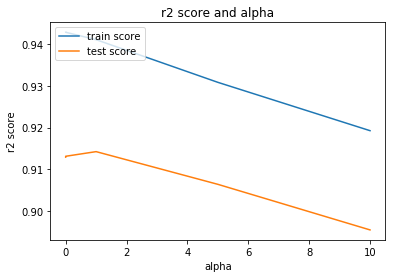

In [1422]:
# plotting mean test and train scoes with alpha to tune hyper parameter
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.title("r2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1423]:
# Now let's do k fold with neg_mean_absolute_error score and tune hyper parameter

# list of alphas to tune
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [1424]:
# results data frame
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.003036      0.000773         0.000804        0.000151       0.001   
1       0.002735      0.000421         0.000726        0.000076        0.01   
2       0.002512      0.000100         0.000688        0.000015           1   
3       0.002549      0.000068         0.000717        0.000037           5   
4       0.002570      0.000079         0.000725        0.000052          10   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}      -13790.634610      -14775.450986      -15643.934630   
1   {'alpha': 0.01}      -13784.808357      -14752.255130      -15604.013552   
2    {'alpha': 1.0}      -13709.346854      -14045.675371      -14949.341984   
3    {'alpha': 5.0}      -14463.458080      -14454.358754      -14645.610176   
4   {'alpha': 10.0}      -15594.933580      -15230.880835      -15151.669122   

   split3_test_score       ...         mean_test_score  std_test_score  \
0      -15588.020625       ...           -14662.014959      885.017572   
1      -15562.394553       ...           -14637.905979      878.139775   
2      -15453.283172       ...           -14321.036212      760.229632   
3      -16348.277593       ...           -14836.476243      765.148185   
4      -17185.958741       ...           -15688.652334      763.643866   

   rank_test_score  split0_train_score  split1_train_score  \
0                3       -11928.755978       -11862.890699   
1                2       -11926.464799       -11862.883546   
2                1       -11972.068891       -11944.404181   
3                4       -13000.720494       -12882.993755   
4                5       -14098.886914       -13904.291216   

   split2_train_score  split3_train_score  split4_train_score  \
0       -11764.867534       -11833.545843       -12358.590773   
1       -11755.653462       -11834.274567       -12353.086091   
2       -11718.386638       -11890.639422       -12251.330793   
3       -12824.034450       -12811.575031       -13024.644877   
4       -13925.911384       -13873.851419       -14019.300217   

   mean_train_score  std_train_score  
0     -11949.730165       211.102343  
1     -11946.472493       210.581250  
2     -11955.365985       172.245786  
3     -12908.793721        88.513578  
4     -13964.448230        82.938817  

[5 rows x 21 columns]

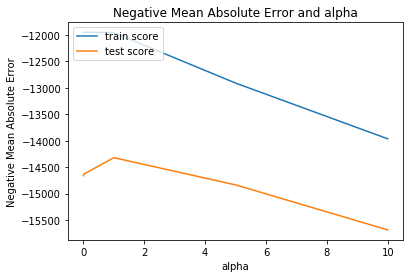

In [1425]:
# plotting mean test and train scoes with alpha to tune hyper parameter
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1426]:
# model with optimal alpha = 1
# lasso regression
lm = Ridge(alpha=1)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9392476999525955
0.9231948226312643


In [1427]:
ridge.fit(X_train, y_train)
ridge.coef_

array([ 5.17810705e+03,  3.11954344e+04,  6.55818914e+04,  4.38983356e+04,
        2.02325383e+04,  4.19034987e+04,  6.07817031e+04,  1.63196413e+03,
       -1.29014691e+04,  1.29756956e+05,  3.60586120e+03,  2.08452492e+04,
        1.03986349e+04, -1.37112051e+04, -1.26215696e+04,  1.03866831e+04,
        2.42451101e+04,  1.21248049e+04,  7.43841048e+03,  9.11524597e+03,
        6.15728811e+03,  8.64787766e+03, -3.19132508e+04, -3.40528294e+04,
        2.77876394e+03,  1.53437167e+04,  3.93427843e+03,  3.13197451e+03,
        1.76475601e+03, -7.99369438e+03, -3.10912421e+03, -1.62279706e+04,
        1.54001673e+04,  3.83214666e+03,  3.06736530e+02,  1.43011669e+03,
        3.12812039e+03, -1.58841502e+04,  4.30019577e+03, -9.48788836e+03,
       -1.25982582e+03,  7.12141477e+03,  8.27061821e+03, -4.44453750e+03,
        2.37479588e+04, -1.11733443e+04, -8.82111374e+03, -1.37348795e+04,
       -5.82795868e+03, -1.40756344e+04,  1.90463510e+04,  7.53473544e+03,
       -4.16783320e+03,  

# Conclusion